# **Title: DeepTemp: Deep Learning for Time Series Room Temperature Data**

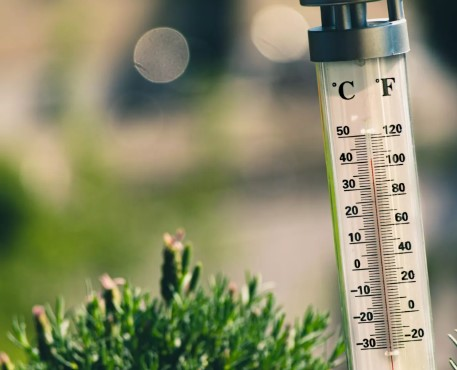

**Overview/Introduction**:
The impact of technological advancements has cascaded into various sectors, and in the realm of climate control, IoT-enabled devices have revolutionized how we track, monitor, and adjust indoor temperature. DeepTemp project, an exemplar of this transformative trend, leverages Deep Learning techniques to analyze time series temperature data in real-time. These temperature readings, sourced from an IoT device, serve as a potent tool for interpreting and predicting room air temperature patterns, contributing to a smarter and more energy-efficient environment.

**Problem Statement**:
The traditional approach to maintaining a comfortable room temperature often involves manual adjustment or a rudimentary scheduling system, both of which can be inefficient and energy-consuming. These methods neither adapt to changing environmental conditions nor incorporate historical data to predict future needs. Furthermore, univariate time series data, such as temperature over time, present unique challenges due to their temporal nature and complex patterns. A more dynamic, adaptive, and predictive system is hence needed to optimize temperature control, reduce energy waste, and maintain an ideal indoor climate.

**Objectives**:
The primary objective of the DeepTemp project is to build a deep learning model that can predict future room temperature based on historical data. This includes:

1. Developing a model that can understand the underlying patterns and temporal relationships within the univariate time series data of room temperature.
2. Implementing a system that can make accurate, real-time predictions about future temperature conditions.
3. Evaluating the model's performance, fine-tuning it to improve prediction accuracy and efficiency.
4. Establishing a foundation for an automated temperature control system that is not only more responsive but also energy efficient.

**Dataset Description**:
The dataset used in the DeepTemp project is derived from an IoT device, a testament to the blending of the physical and digital realms in pursuit of enhanced climatic comfort. This dataset presents a chronological record of room temperature measurements, marking each entry with a precise date and hour.

In the context of time series analysis, this data set is categorized as a univariate time series dataset, meaning it comprises a single variable – in this case, the room temperature. Each data point in the series is intrinsically tied to a specific moment, creating a continual chain of temporal relationships.

Key Features:
1) **Hourly_Temp**: This feature denotes the mean supply air temperature, measured in degrees Celsius per hour, providing granular insight into the room's climate.

2) **Datetime**: This feature records the exact date and hour of each temperature measurement, establishing the chronological order and temporal context crucial for time series analysis.


**Dataset URL:** https://www.kaggle.com/datasets/vitthalmadane/ts-temp-1

**Technologies Used:**
The project was implemented using the Python programming language due to its robust ecosystem of libraries and tools useful for data science and machine learning tasks. Python libraries utilized in the project include:

1. **Pandas**: Used for loading the CSV data and performing exploratory data analysis, like handling missing values and duplicates.
2. **Numpy**: Employed in handling numerical operations, like replacing missing data entries.
3. **TensorFlow**: A comprehensive open-source platform for machine learning. TensorFlow's Keras API was utilized to construct and train different neural network models.
4. **CSV**: Used for reading CSV files and performing basic data handling operations.
5. **Datetime**: Used to convert date strings to datetime objects.

**Methodology:**
The methodology adopted in the project revolved around time series forecasting using machine learning techniques. The project was divided into several stages: data loading and preprocessing, model creation, training, and evaluation.

CSV data was loaded using both pandas and csv libraries. Missing values and duplicates were identified and handled appropriately. The data was then split into training and validation sets using an 80/20 split ratio.

Model Creation:
Multiple models were created and trained:

1. A simple Dense Neural Network (DNN) with three layers of 32, 16, and 1 units respectively, with ReLU activation function.
2. A simple Recurrent Neural Network (RNN) consisting of two SimpleRNN layers followed by a Dense layer.
3. A Bi-directional Long Short-Term Memory (LSTM) model.
4. A model combining Conv1D and LSTM layers.
5. The models were compiled using the Huber loss function, Adam optimizer, and the Mean Absolute Error (MAE) metric.

Each model was trained on the training data for 100 epochs, with validation performed using the validation data set. The models' performances were compared based on the Mean Absolute Error (MAE) obtained during validation.

**Results:**
We compared the performance of four models: Simple RNN, Bi-LSTM, Dense, and Conv1D + LSTM. The Simple RNN model showed the lowest mean absolute error (MAE) of 0.589606. Bi-LSTM performed moderately, with an R2 value of 0.854599. The Dense model had the highest R2 value of 0.865903, whereas the Conv1D + LSTM model, despite having the highest R2 (0.869525), had the highest MAE of 0.631698.

**Discussion:**
The Dense model, with the highest R2, emerged as the most efficient, explaining 86.59% of the variability. The Conv1D + LSTM model, although showing high R2, had a high MAE, suggesting potential overfitting. The Simple RNN model's lowest MAE might be preferable in situations where minimizing errors is essential. Despite its complexity, Bi-LSTM performed moderately, indicating a simpler model might be sufficient.

**Conclusion**

In conclusion, the results indicate that the Dense model was the best performing model for this particular task, closely followed by the Simple RNN model. While the Conv1D + LSTM model had the highest R2 value, its relatively high MAE suggests it may not be the best model for this particular application, especially if minimizing the average error is a priority.

This research demonstrates the importance of model selection in time series forecasting. It's clear that a more complex model does not always lead to better results, and simpler models can be just as effective, if not more so, depending on the specific application. In future work, hyperparameter tuning could potentially improve these models' performance, and other models and techniques could be explored as well.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ts-temp-1/MLTempDataset.csv
/kaggle/input/ts-temp-1/MLTempDataset1.csv


In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-07-09 23:54:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-09 23:54:28 (77.0 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The following code shows the import of the pandas library and the reading of a CSV file into a pandas DataFrame. The date column is parsed as a datetime column, and the DataFrame is indexed by the date column.

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/kaggle/input/ts-temp-1/MLTempDataset1.csv",
                 parse_dates=["Datetime"],
                 index_col=["Datetime"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400


In [ ]:
# How many samples do we have?
len(df)

7056

**Duplicates & Missing Values**

The next code calculates the number of data points in the DataFrame and prints the result. It also checks for duplicate rows in the DataFrame and prints the number of duplicates. The code then checks for missing values in the DataFrame and prints the number of missing values for each column and the total number of missing values. After that, the code replaces empty strings with NaN (Not a Number) values in the DataFrame and rechecks for missing values.

In [ ]:
import numpy as np

# How many data do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values by column after replacement:\n',missing_values)
print('Number of Missing Values after replacement:', df.isnull().sum().sum())

There are 7056 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 Unnamed: 0     0
Hourly_Temp    0
dtype: int64
Number of Missing Values: 0
Number of Missing Values by column after replacement:
 Unnamed: 0     0
Hourly_Temp    0
dtype: int64
Number of Missing Values after replacement: 0


The next code block extracts the first and last date from the index of the DataFrame and combines them into a single string representing the date range.

In [ ]:
# get the first and last date from the index
first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

# combine the dates into a single string
date_range = f"{first_date} to {last_date}"
date_range

'2022-01-04 to 2022-10-24'

The following code uses the matplotlib library to create a line plot of the 'Hourly_Temp' column from the DataFrame. The plot title includes the date range obtained previously.

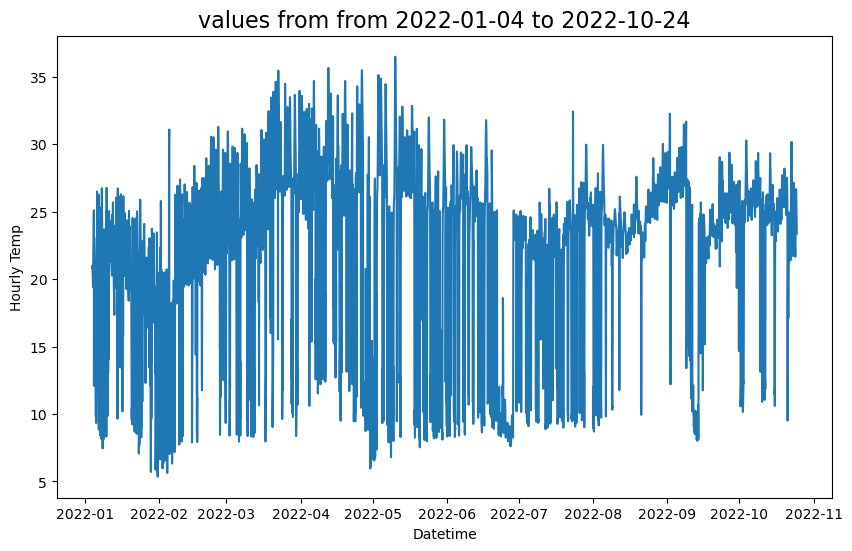

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Hourly_Temp'])
plt.title(f"values from from {date_range}", fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Hourly Temp')
plt.show()


The code block df.describe().T calculates and displays summary statistics (count, mean, min, max, etc.) for each column in the DataFrame.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7056.0,3527.500000,2037.036082,0.00,1763.75,3527.500,5291.250,7055.0
Hourly_Temp,7056.0,21.867468,6.737313,5.35,18.40,24.033,26.333,36.5


**Utilities**

The next code block defines the function for visualizing and generating time series data. The plot_series function plots a time series given the time steps and measurements.

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

**Import Data with Python**

The following code imports the csv module and opens a CSV file. It creates a CSV reader object and reads the first row (header) of the CSV file. It then finds the indices of the columns with names "Datetime" and "Hourly_Temp" and prints the indices.

In [ ]:
import csv

# Open the CSV file
with open("/kaggle/input/ts-temp-1/MLTempDataset1.csv", "r") as f:

    # Create a CSV reader object
    reader = csv.reader(f)

    # Read the first row (header) of the CSV file
    header = next(reader)

    # Print the column names
    print(header)

    # Find the indices of columns with names "Date" and "Close"
    date_index = header.index("Datetime")
    temp_index = header.index("Hourly_Temp")

    # Print the indices for columns "Date" and "Close"
    print("Index for column 'Date':", date_index)
    print("Index for column 'Temp':", temp_index)

['', 'Datetime', 'Hourly_Temp']
Index for column 'Date': 1
Index for column 'Temp': 2


The next code block uses the csv module and datetime module to read the data from the CSV file into two separate lists: time and series. It skips the first line (column titles) and converts the date strings to datetime objects and the temperature values to floats.

In [ ]:
from datetime import datetime

time = []
series = []

with open("/kaggle/input/ts-temp-1/MLTempDataset1.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    time.append(datetime.strptime(line[date_index], "%Y-%m-%d %H:%M:%S")) # get the dates as dates (not strings), strptime = string parse time
    series.append(float(line[temp_index])) # get the closing price as float

# View first 10 of each
time[:10], series[:10]

([datetime.datetime(2022, 1, 4, 0, 0),
  datetime.datetime(2022, 1, 4, 1, 0),
  datetime.datetime(2022, 1, 4, 2, 0),
  datetime.datetime(2022, 1, 4, 3, 0),
  datetime.datetime(2022, 1, 4, 4, 0),
  datetime.datetime(2022, 1, 4, 5, 0),
  datetime.datetime(2022, 1, 4, 6, 0),
  datetime.datetime(2022, 1, 4, 7, 0),
  datetime.datetime(2022, 1, 4, 8, 0),
  datetime.datetime(2022, 1, 4, 9, 0)],
 [20.867, 21.0, 20.867, 20.65, 20.4, 20.1, 19.8, 19.5, 19.4, 19.5])

**Split the Dataset**

The code block defines the split time for the train-test split as 80% of the data. It creates the train set and validation set by splitting the time and series lists accordingly.

In [ ]:
# Define the split time
split_ratio = 0.8  # 80% for the training set
split_time = int(len(series) * split_ratio)

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
time_train[:2], x_train[:2], time_valid[:2], x_valid[:2]

([datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 4, 1, 0)],
 [20.867, 21.0],
 [datetime.datetime(2022, 8, 27, 4, 0), datetime.datetime(2022, 8, 27, 5, 0)],
 [26.15, 25.867])

In [ ]:
len(time_train), len(x_train), len(time_valid), len(x_valid),

(5644, 5644, 1412, 1412)

The code block displays a plot of the train and test data, showing the split between them.

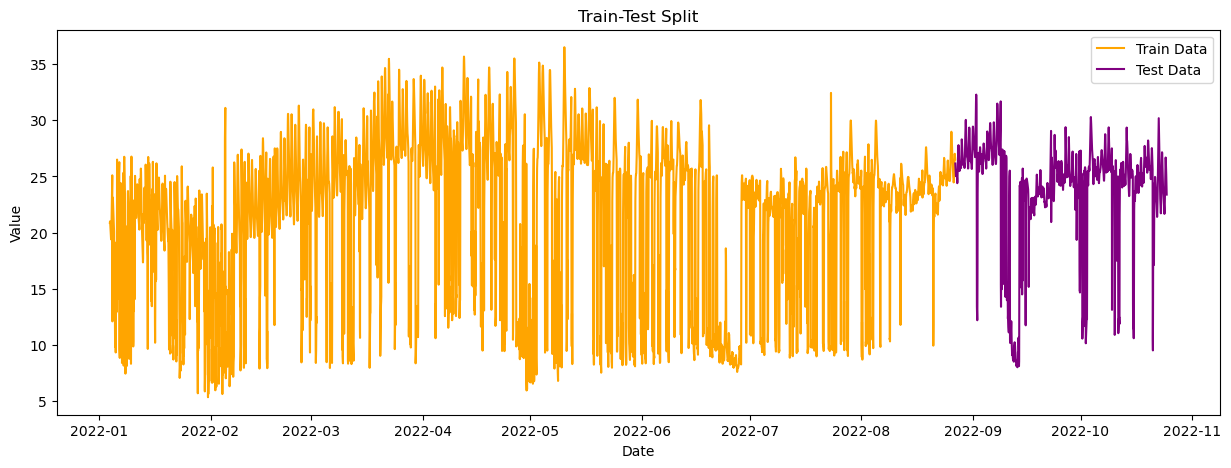

In [ ]:
#displays a plot of the train/test split
fig = plt.figure(figsize=(15,5))
plt.plot(time_train, x_train, color='orange', label='Train Data')
plt.plot(time_valid, x_valid, color='purple', label='Test Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train-Test Split')
plt.legend()
plt.show()

**Prepare Features and Labels**

The next code block defines the parameters for creating windowed datasets for time series analysis. It specifies the window size, batch size, and shuffle buffer size.

In [ ]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

The windowed_dataset function generates a TensorFlow Dataset object containing time windows. It takes the series data, window size, batch size, and shuffle buffer size as inputs and returns the dataset.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

The code block generates the dataset windows for the training set using the windowed_dataset function.

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

The next code block generates data windows for the validation set using the windowed_dataset function.

In [ ]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [ ]:
dataset, val_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

The code block prints the shape of a sample batch from the training dataset, showing the shape of the input features and labels.

In [ ]:
for a,b in dataset.take(1):
    print(a.shape)
    print(b.shape)

(32, 7)
(32,)


The code block prints the shape of a sample batch from the validation dataset, showing the shape of the input features and labels.

In [ ]:
for c,d in val_set.take(1):
    print(c.shape)
    print(d.shape)

(32, 7)
(32,)


**Model: Dense**

The following code block builds a baseline model using the Sequential API of TensorFlow's Keras module. The model consists of three dense layers with 32, 16, and 1 units, respectively, and ReLU activation. It then prints a summary of the model, which provides an overview of the model's architecture and the number of parameters.

In [ ]:
tf.random.set_seed(42)

# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


The next code block imports necessary modules for defining the loss function (Huber) and optimizer (Adam). It sets the training parameters for the baseline model by specifying the loss function, optimizer, and metrics (mean absolute error).

In [ ]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

# Set the training parameters
model_baseline.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

The code block trains the baseline model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Train the model
model_baseline.fit(dataset,validation_data=val_set, epochs=100)

Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 7.9125 - mae: 8.3551 - val_loss: 0.7324 - val_mae: 1.0709
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 1.2858 - mae: 1.6386 - val_loss: 0.4555 - val_mae: 0.7265
Epoch 3/100
177/177 [==============================] - 1s 5ms/step - loss: 1.1460 - mae: 1.4803 - val_loss: 0.4148 - val_mae: 0.6607
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 1.1104 - mae: 1.4377 - val_loss: 0.4521 - val_mae: 0.7587
Epoch 5/100
177/177 [==============================] - 1s 5ms/step - loss: 1.0945 - mae: 1.4228 - val_loss: 0.4055 - val_mae: 0.6630
Epoch 6/100
177/177 [==============================] - 1s 5ms/step - loss: 1.1081 - mae: 1.4392 - val_loss: 0.3942 - val_mae: 0.6223
Epoch 7/100
177/177 [==============================] - 1s 5ms/step - loss: 1.0784 - mae: 1.3932 - val_loss: 0.3965 - val_mae: 0.6255
Epoch 8/100
177/177 [==============================] - 1s 5ms/step - 

After training the model, the code block evaluates the model's performance on the validation dataset using the evaluate method, which returns the loss and metrics values.

In [ ]:
# Evaluate model on test data
model_baseline.evaluate(val_set)

44/44 [==============================] - 0s 2ms/step - loss: 0.3956 - mae: 0.6094


[0.3956151008605957, 0.6093950867652893]

The code uses the trained model to generate predictions on the validation dataset and assigns the predictions to the model_1_preds variable.

In [ ]:
model_1_preds = model_baseline.predict(val_set)
model_1_preds.shape

44/44 [==============================] - 0s 2ms/step


(1405, 1)

The next code block defines the model_forecast function, which takes a trained model, a time series, window size, and batch size as inputs, and returns the model's predictions on the input data. It uses TensorFlow's Dataset API to prepare the input data and generates predictions using the trained model.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

The code block reduces the original series by selecting a subset of data from the validation set for forecasting. It then calls the model_forecast function to generate predictions using the baseline model and the reduced series. The predictions are stored in the forecast variable. Next, the code block drops the single-dimensional axis from the forecast and the original validation data. It then plots the results, showing the actual values (x_valid) and the predicted values (results) against time.

45/45 [==============================] - 0s 3ms/step


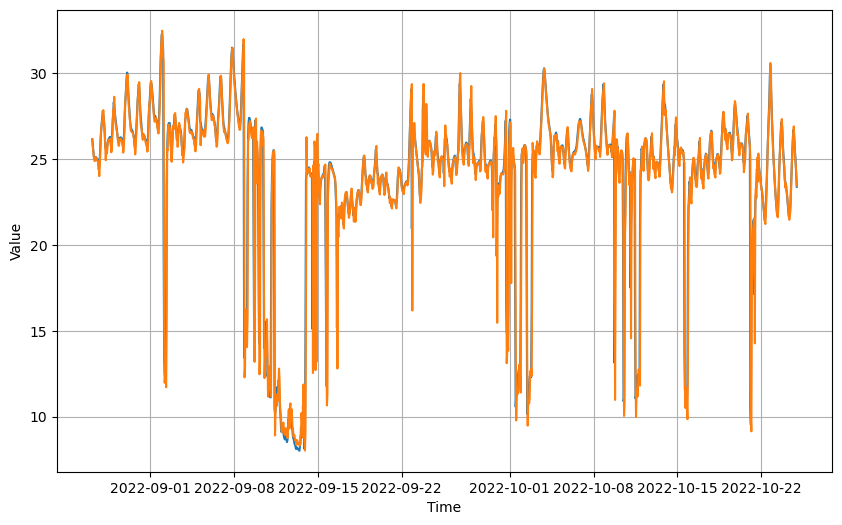

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_baseline, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block defines several evaluation metrics functions, including mean absolute scaled error (MASE), R-squared, and metrics for evaluating predictions. These functions are used to evaluate the performance of the model.

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  r2 = r_squared(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy(),
          "r2": r2.numpy()}


The code block calculates and prints the evaluation metrics for the baseline model's predictions on the validation data.

In [ ]:
# Evaluate preds
results_baseline = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_baseline

{'mae': 0.6069202,
 'mse': 3.0189714,
 'rmse': 1.7375188,
 'mape': 3.2656398,
 'mase': 0.87706035,
 'r2': 0.8659026}

In [ ]:
# Find average temp in test dataset
tf.reduce_mean(x_valid).numpy()

23.992794

**Model: SimpleRNN**

The next code block builds a model using a simple RNN (recurrent neural network) architecture. The model includes two layers of SimpleRNN cells with 256 and 128 units, respectively. It also includes a Dense layer with 1 unit for the output. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code next trains the RNN model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(256, return_sequences=True),
  tf.keras.layers.SimpleRNN(128),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
177/177 [==============================] - 4s 11ms/step - loss: 9.7026 - mae: 10.1905 - val_loss: 8.3014 - val_mae: 8.7915
Epoch 2/100
177/177 [==============================] - 2s 10ms/step - loss: 6.0930 - mae: 6.5727 - val_loss: 5.9953 - val_mae: 6.4850
Epoch 3/100
177/177 [==============================] - 2s 11ms/step - loss: 4.5145 - mae: 4.9859 - val_loss: 4.0479 - val_mae: 4.5295
Epoch 4/100
177/177 [==============================] - 2s 12ms/step - loss: 3.2733 - mae: 3.7313 - val_loss: 2.4453 - val_mae: 2.9088
Epoch 5/100
177/177 [==============================] - 2s 12ms/step - loss: 2.4266 - mae: 2.8552 - val_loss: 1.4700 - val_mae: 1.8966
Epoch 6/100
177/177 [==============================] - 2s 12ms/step - loss: 1.9299 - mae: 2.3227 - val_loss: 0.9230 - val_mae: 1.2926
Epoch 7/100
177/177 [==============================] - 2s 12ms/step - loss: 1.6497 - mae: 2.0183 - val_loss: 0.6726 - val_mae: 0.9907
Epoch 8/100
177/177 [==============================] - 2s 11m

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

45/45 [==============================] - 0s 6ms/step


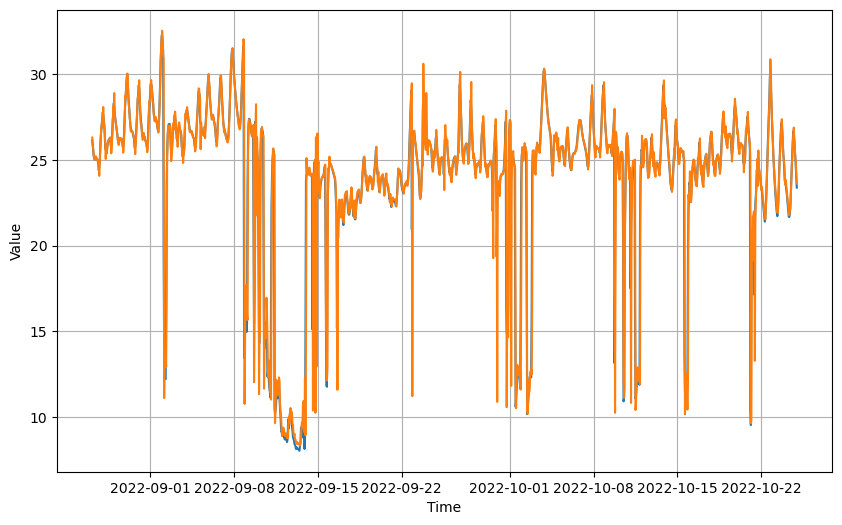

In [ ]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the RNN model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_rnn = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_rnn

{'mae': 0.58960575,
 'mse': 3.3387082,
 'rmse': 1.8272132,
 'mape': 3.1636574,
 'mase': 0.8520392,
 'r2': 0.8517004}

**Model: Bi-directional LSTM**

The next code block builds a model using a bidirectional LSTM (long short-term memory) architecture. First, it resets the states generated by Keras to ensure a clean state for building the next model. The model includes two layers of bidirectional LSTM cells with 128 units each. It also includes a Dense layer with 256 units and a dropout layer with a rate of 0.4. The model is compiled with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric. The code block trains the LSTM model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
177/177 [==============================] - 13s 40ms/step - loss: 9.0240 - mae: 9.5083 - val_loss: 2.1252 - val_mae: 2.5860
Epoch 2/100
177/177 [==============================] - 6s 32ms/step - loss: 3.0860 - mae: 3.5510 - val_loss: 1.5066 - val_mae: 1.9843
Epoch 3/100
177/177 [==============================] - 6s 32ms/step - loss: 2.3169 - mae: 2.7701 - val_loss: 0.7834 - val_mae: 1.1997
Epoch 4/100
177/177 [==============================] - 6s 32ms/step - loss: 2.1121 - mae: 2.5608 - val_loss: 0.6831 - val_mae: 1.0790
Epoch 5/100
177/177 [==============================] - 6s 32ms/step - loss: 1.9931 - mae: 2.4384 - val_loss: 0.6515 - val_mae: 1.0596
Epoch 6/100
177/177 [==============================] - 6s 32ms/step - loss: 1.9900 - mae: 2.4325 - val_loss: 0.5426 - val_mae: 0.8875
Epoch 7/100
177/177 [==============================] - 6s 32ms/step - loss: 1.9235 - mae: 2.3661 - val_loss: 0.6272 - val_mae: 1.0339
Epoch 8/100
177/177 [==============================] - 6s 31m

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axis from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

45/45 [==============================] - 2s 11ms/step


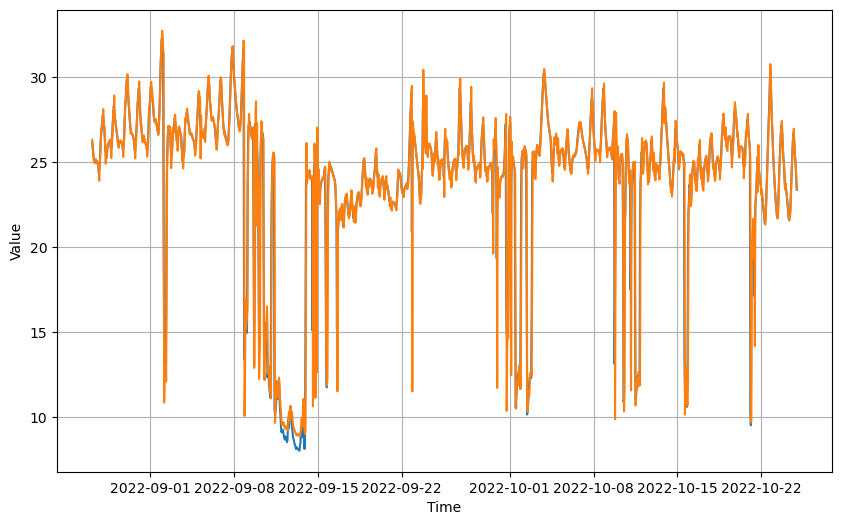

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the LSTM model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_bilstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_bilstm

{'mae': 0.6015503,
 'mse': 3.2734416,
 'rmse': 1.8092655,
 'mape': 3.2429802,
 'mase': 0.8693003,
 'r2': 0.8545995}

**Model: Conv1D + LSTM**

The code block builds a model using a combination of convolutional and LSTM layers. The model includes a 1D convolutional layer with 64 filters, a kernel size of 3, and "causal" padding. It also includes two layers of bidirectional LSTM cells with 128 units each. The model further includes a dropout layer with a rate of 0.3, a dense layer with 512 units and "relu" activation, and a dense layer with 1 unit. The model's output is multiplied by 400 using a lambda layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Lambda, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(128)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             256       
                                                                 
 bidirectional (Bidirectiona  (None, 7, 256)           197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

The code block sets the training parameters for the model, compiling it with the Huber loss function, Adam optimizer, and mean absolute error (MAE) metric.

In [ ]:
# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])


The code block trains the model using the fit method, providing the training dataset (dataset) and the validation dataset (val_set) as input, and specifying the number of epochs.

In [ ]:
# Train the model
history = model.fit(dataset, epochs=100, validation_data=val_set)

Epoch 1/100
177/177 [==============================] - 14s 44ms/step - loss: 20.0395 - mae: 20.5328 - val_loss: 4.5400 - val_mae: 5.0380
Epoch 2/100
177/177 [==============================] - 6s 35ms/step - loss: 5.4628 - mae: 5.9450 - val_loss: 6.2351 - val_mae: 6.7329
Epoch 3/100
177/177 [==============================] - 6s 34ms/step - loss: 3.8522 - mae: 4.3265 - val_loss: 3.1541 - val_mae: 3.6373
Epoch 4/100
177/177 [==============================] - 6s 35ms/step - loss: 3.2785 - mae: 3.7465 - val_loss: 5.1420 - val_mae: 5.6328
Epoch 5/100
177/177 [==============================] - 7s 36ms/step - loss: 2.9096 - mae: 3.3752 - val_loss: 4.3263 - val_mae: 4.8188
Epoch 6/100
177/177 [==============================] - 6s 35ms/step - loss: 2.5082 - mae: 2.9682 - val_loss: 2.2801 - val_mae: 2.7640
Epoch 7/100
177/177 [==============================] - 6s 35ms/step - loss: 2.4766 - mae: 2.9387 - val_loss: 2.6356 - val_mae: 3.1221
Epoch 8/100
177/177 [==============================] - 6s 3

After training the model, the code block generates predictions using the trained model and the reduced series from the validation set. It then drops the single-dimensional axes from the forecast and the original validation data. Finally, it plots the results, showing the actual values and the predicted values.

45/45 [==============================] - 2s 12ms/step


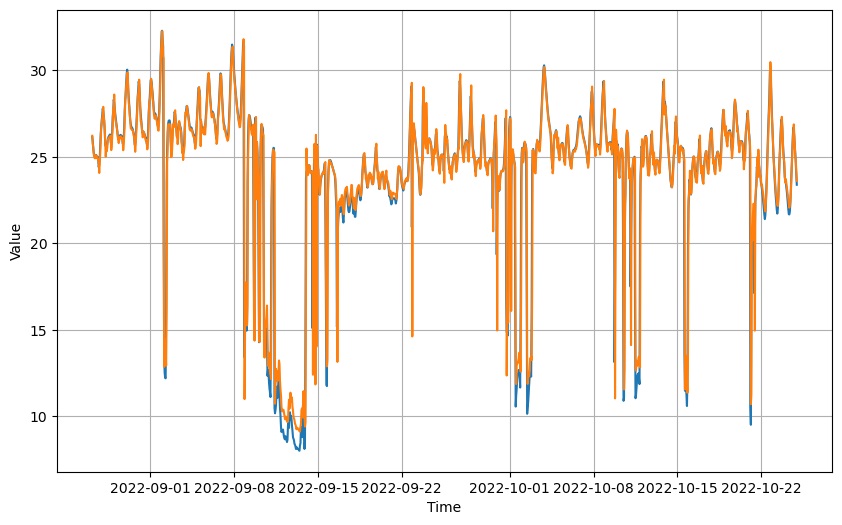

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

The code block evaluates the predictions of the model using the evaluation metrics defined earlier and prints the results.

In [ ]:
# Evaluate preds
results_conv_lstm = evaluate_preds(y_true=x_valid, # reduce to right shape
                                 y_pred=results)
results_conv_lstm

{'mae': 0.6316984,
 'mse': 2.9374123,
 'rmse': 1.713888,
 'mape': 3.6202621,
 'mase': 0.91286737,
 'r2': 0.8695253}

**Compare Models**

The next code block creates a DataFrame, model_results, to compare the results of different models. It includes the MAE values of the baseline model, Simple RNN model, Bi-LSTM model, Conv1D + LSTM model, and the CNN model. The DataFrame is then sorted based on the MAE values.

In [ ]:
# Compare different model results
model_results = pd.DataFrame({"Model_Dense": results_baseline,
                              "Simple RNN": results_rnn,
                              "Bi-LSTM": results_bilstm,
                              "Conv1D + LSTM": results_conv_lstm,
                             }).T

model_results = model_results.sort_values(by="mae")

model_results.head(10)

,mae,mse,rmse,mape,mase,r2
Simple RNN,0.589606,3.338708,1.827213,3.163657,0.852039,0.851700
Bi-LSTM,0.601550,3.273442,1.809265,3.242980,0.869300,0.854599
Model_Dense,0.606920,3.018971,1.737519,3.265640,0.877060,0.865903
Conv1D + LSTM,0.631698,2.937412,1.713888,3.620262,0.912867,0.869525


The code block plots a bar chart to visualize the MAE values of the different models, sorted in ascending order. This allows for a visual comparison of the model performance based on the MAE metric.

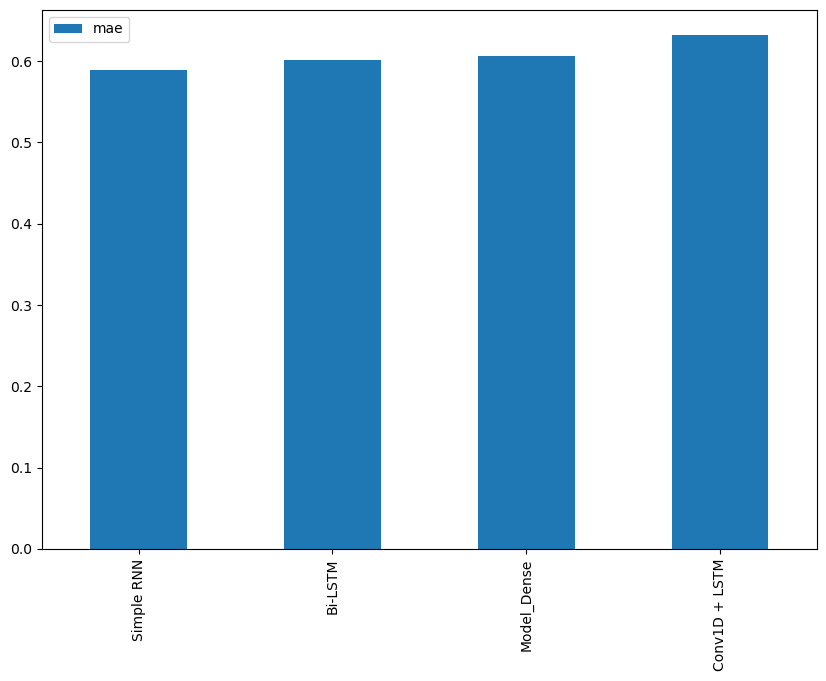

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The results of the different models are compared based on various evaluation metrics. The Simple RNN model achieved a mean absolute error (MAE) of 0.589606, a mean squared error (MSE) of 3.338708, a root mean squared error (RMSE) of 1.827213, a mean absolute percentage error (MAPE) of 3.163657, a mean absolute scaled error (MASE) of 0.852039, and an R-squared (R2) value of 0.851700. The Bi-LSTM model performed slightly worse with a higher MAE of 0.601550, MSE of 3.273442, RMSE of 1.809265, MAPE of 3.242980, MASE of 0.869300, and an R2 of 0.854599. The Model_Dense model had a slightly higher MAE of 0.606920, MSE of 3.018971, RMSE of 1.737519, MAPE of 3.265640, MASE of 0.877060, and a higher R2 value of 0.865903. The Conv1D + LSTM model had the highest MAE of 0.631698, MSE of 2.937412, RMSE of 1.713888, MAPE of 3.620262, MASE of 0.912867, and an R2 of 0.869525. Overall, the Conv1D + LSTM model performed slightly worse in terms of MAE and RMSE, while the Model_Dense model showed the best performance with the highest R2 value.